# Na aula anterior...

Por que precisamos podar as árvores?

Precisamos nos preocupar com outliers em árvores de decisão? Por que?

# Hoje!

### Usos da árvore além de modelos

**Criar categorizações:** construa uma árvore de uma feauture contínua e profundidade baixa (1 ou 2), em seguida visualize essa árvore. O que você consegue concluir?

In [131]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score

In [132]:
df = pd.read_csv('dados/titanic.csv')

In [133]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
df['Age'] = df['Age'].fillna(value = df['Age'].mean())

In [135]:
var_expl = ['Age']
var_resp = 'Survived'

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

print('treino:', x_treino.shape, y_treino.shape)
print('teste:', x_teste.shape, y_teste.shape)

modelo = DecisionTreeClassifier(max_depth=4, min_samples_split=0.2, max_leaf_nodes=3, random_state = 1)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

treino: (712, 1) (712,)
teste: (179, 1) (179,)


0.4722150426466787

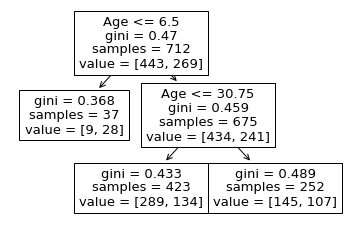

In [136]:
plot_tree(modelo, feature_names=['Age']);

**Fazer seleção de feature:** construa uma árvore com todas as features disponíveis, porém com profundidade de até 3 ou 4, em seguida visualize essa árvore. Todas as features aparecem nessa árvore?


In [137]:
var_expl_num = ['Pclass', 'Age', 'SibSp','Parch', 'Fare']
var_expl_cat = ['Embarked','Sex']
var_expl = var_expl_num + var_expl_cat
var_resp = 'Survived'

df.dropna(subset=var_expl, inplace=True)

df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 1)

x_treino = df_treino[var_expl].copy()
x_teste = df_teste[var_expl].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

oe = OrdinalEncoder()
x_treino[var_expl_cat] = oe.fit_transform(x_treino[var_expl_cat])
x_teste[var_expl_cat] = oe.transform(x_teste[var_expl_cat])

print('treino:', x_treino.shape, y_treino.shape)
print('teste:', x_teste.shape, y_teste.shape)

modelo = DecisionTreeClassifier(max_depth=4, min_samples_split=0.2, max_leaf_nodes=6, random_state = 1)
modelo.fit(x_treino, y_treino)

y_teste_pred = modelo.predict_proba(x_teste)[:, 1]

roc_auc_score(y_teste, y_teste_pred)

treino: (711, 7) (711,)
teste: (178, 7) (178,)


0.858969341161122

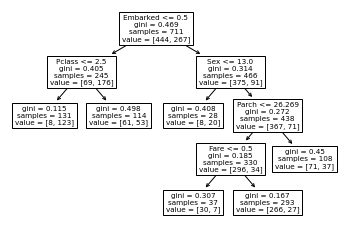

In [138]:
plot_tree(modelo, feature_names=['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']);

## Utilidades do sklearn
Case Exemplo:
    
Você está tratando dados sobre COVID-19, querendo identificar se uma determinada pessoa foi contaminada pelo vírus usando apenas informação que não são diretamente relacionadas à saúde (atuação profissional, idade, peso, sexo, cidade onde mora, cidade onde trabalha, quantidade de casos no Brasil, quantidade de mortes no Brasil).

Para isso, você separou os dados em dois conjuntos, um para treino (até jun/21) e outro para teste (jul/21 em diante). Você optou por usar um KNN, e para isso precisou usar o MinMaxScaler para deixar todos os dados na mesma escala, incluindo a quantidade de mortes no Brasil.  MinMaxScaler usa a seguinte fórmula para fazer o redimensionamento, e para isso você precisou olhar para os dados e identificar o x_max e o x_min.

x_final = (x - x_min) / (x_max - x_min)

Baseado nos dados (reais que vemos nos jornais), qual o x_min e o x_max que devem ser usados?

<a href="https://www.google.com/search?q=estatisticas+covid+brasil&bih=666&biw=1280&hl=en&sxsrf=ALeKk00BvVGoh1F6CPgprcYl5erOw8CHOQ%3A1617141467586&ei=255jYLScI6zA5OUPt-2fsAw&oq=estatisticas+covid+brasil&gs_lcp=Cgdnd3Mtd2l6EAMyBAgAEA0yBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjIICAAQCBAHEB46CAgAELADEMsBOgcIABCwAxBDOgUIABDLAToECAAQHjoGCAAQCBAeUJyfBliFrgZgnK8GaAJwAHgAgAG2AogB4BySAQYyLTEzLjGYAQCgAQGqAQdnd3Mtd2l6yAEKwAEB&sclient=gws-wiz&ved=0ahUKEwj09ee1gdnvAhUsILkGHbf2B8YQ4dUDCA0&uact=5">
<img src = "imagens/covid.png" width = 50% />
</a>

- Data Leakage é um baita problema, e o sklearn nos ajuda a mitigá-lo.
- sklearn segue um padrão para modelos e transformadores
    - Esse padrão inclusive pode ser apontado como uma das causas do enorme sucesso do sklearn


Padrão de Modelos: 
```
modelo = ModeloDePrevisao(hiperparâmetros)

modelo.fit(x_treino, y_treino)
y_pred = modelo.preditc(x_teste)

metrica(y_teste, y_pred)
```

Padrão de Transformadores:
```
trans = Transformador(hiperparâmetros)

x_treino = trans.fit_transform(x_treino)
x_teste = trans.transform(x_teste)
```

- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html)
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)

### Projeto
Usando o dataset do projeto, crie modelos usando Regressão Logística, Árvore de Decisão e KNN para identificar se uma pessoa será adimplente ou inadimplente, realizando os pré-processamentos necessários para cada um. Utilize a metodologia de avaliação de sua preferência, mas seu modelo será avaliado em um conjunto apartado. Que conclusões você consegue tirar a partir do modelo?